# Análisis de Natalidad y Restaurantes con Estrellas Michelin

Este proyecto analiza la relación entre las tasas de natalidad en España y la distribución de restaurantes con estrellas Michelin, utilizando técnicas de visualización geográfica y análisis estadístico.

In [105]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import cartopy
import pandas as pd
from shapely import wkt
import matplotlib
import contextily as ctx
import numpy as np
import cartopy.crs as ccrs  # Añadimos esta importación

# Seleccionamos un tamaño de letra que se pueda leer.
matplotlib.rcParams.update({'font.size': 14})

# Primera parte: Natalidad

Comencaremos con un dataset que nos indica la natalidad en cada una de las provincias de España.

In [96]:
spain_birthrate_df = gpd.read_file("natalidad.geojson")
spain_birthrate_df

,NAME_1,NAME_2,CC_2,NAT2018,geometry
0,Andalucía,Almería,04,10.48,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35..."
1,Andalucía,Cádiz,11,8.11,"MULTIPOLYGON (((-6.21958 36.3811, -6.21958 36...."
2,Andalucía,Córdoba,14,7.90,"MULTIPOLYGON (((-5.04854 37.6369, -5.04667 37...."
3,Andalucía,Granada,18,7.78,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36..."
4,Andalucía,Huelva,21,7.57,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37..."
5,Andalucía,Jaén,23,7.68,"MULTIPOLYGON (((-3.00812 37.60799, -3.02137 37..."
6,Andalucía,Málaga,29,8.14,"MULTIPOLYGON (((-4.00083 36.73986, -4.00153 36..."
7,Andalucía,Sevilla,41,8.71,"MULTIPOLYGON (((-5.94118 36.85199, -5.9527 36...."
8,Aragón,Huesca,22,7.51,"MULTIPOLYGON (((0.34747 41.42733, 0.34187 41.4..."
9,Aragón,Teruel,44,7.10,"MULTIPOLYGON (((0.02648 40.69497, 0.02688 40.7..."


## Ejercicio 1

¿Cómo se distribuye la natalidad en las diferentes comunidades autónomas? 

In [97]:
# Agrupamos por comunidad autónoma y calculamos la media
natalidad_por_ca = spain_birthrate_df.groupby('NAME_1')['NAT2018'].mean().sort_values(ascending=True)
natalidad_por_ca

#por provincias
natalidad_por_ca = spain_birthrate_df.groupby('NAME_2')['NAT2018'].mean().sort_values(ascending=True)
natalidad_por_ca

NAME_2
Ourense                    4.82
Zamora                     5.13
Asturias                   5.60
León                       5.68
Lugo                       5.94
Palencia                   6.08
Ávila                      6.15
Salamanca                  6.23
Cuenca                     6.29
Pontevedra                 6.35
A Coruña                   6.36
Santa Cruz de Tenerife     6.54
Cantabria                  6.55
Cáceres                    6.62
Burgos                     6.62
Valladolid                 6.65
Soria                      6.78
Las Palmas                 6.83
Segovia                    6.85
Vizcaya                    6.99
Teruel                     7.10
Ciudad Real                7.41
La Rioja                   7.45
Huesca                     7.51
Huelva                     7.57
Valencia                   7.60
Alicante                   7.63
Zaragoza                   7.64
Guipúzcoa                  7.68
Jaén                       7.68
Badajoz                    7.73
A

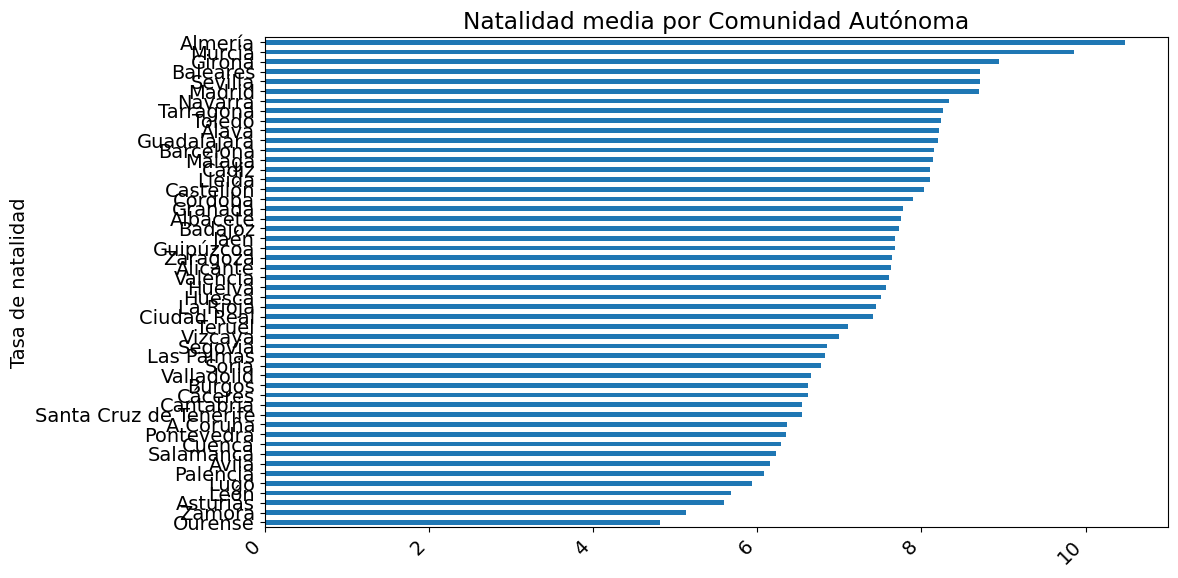

In [98]:
# Creamos la figura
plt.figure(figsize=(12, 6))
natalidad_por_ca.plot(kind='barh')
plt.xticks(rotation=45, ha='right')
plt.title('Natalidad media por Comunidad Autónoma')
plt.ylabel('Tasa de natalidad')
plt.tight_layout()
plt.show()

## Ejercicio 2

Visualizar en un mapa la natalidad de todas las provincias.

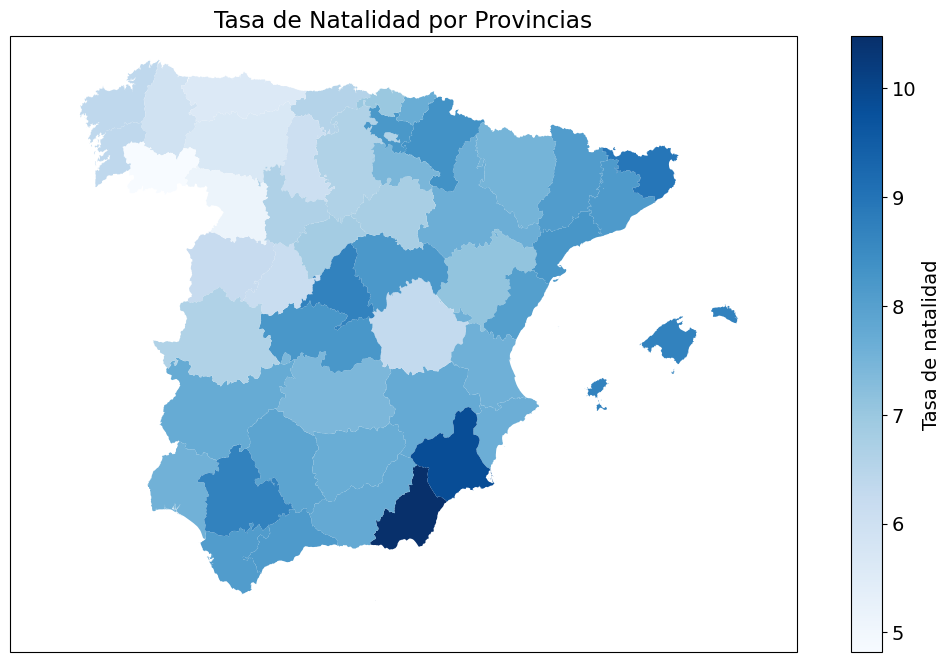

In [99]:
# Creamos la figura con una proyección adecuada para España
fig, ax = plt.subplots(figsize=(14, 8), subplot_kw={
    'projection': gcrs.AlbersEqualArea(
        central_longitude=-3.0,  # Longitud central aproximada de España
        central_latitude=40.0    # Latitud central aproximada de España
    )
})

# Representamos el mapa coroplético
gplt.choropleth(
    spain_birthrate_df,
    hue='NAT2018',           # Variable a representar
    ax=ax,
    legend=True,
    cmap='Blues',            # Escala de colores amarillo-naranja-rojo
    legend_kwargs={'label': 'Tasa de natalidad'}
)

# Hacemos visible el contorno del gráfico
ax.spines['geo'].set_visible(True)

# Ajustamos los límites del mapa para centrarnos en España
ax.set_extent([-10, 5, 35, 44])  # [longitud_min, longitud_max, latitud_min, latitud_max]

# Añadimos título
plt.title('Tasa de Natalidad por Provincias')

plt.show()

# Segunda parte: Restaurantes

En la segunda parte trataremos con un dataset que almacena los restaurantes que fueron galardonados con algún premio de la guía michelín. [Dataset](https://www.kaggle.com/jackywang529/michelin-restaurants?select=two-stars-michelin-restaurants.csv).

## Ejercicio 3
¿Qué regiones tienen más restaurantes con estrellas michelín? ¿Cuantas estrellas de cada tipo tiene cada una de estas regiones?

*Nota: por tipo, nos referimos a 1 estrella, 2 estrellas o 3 estrellas*

In [103]:
una_estrella_michelin = pd.read_csv('one-star-michelin-restaurants.csv')
dos_estrellas_michelin = pd.read_csv('two-stars-michelin-restaurants.csv')
tres_estrellas_michelin = pd.read_csv('three-stars-michelin-restaurants.csv')

# 1. Añadimos la columna de estrellas a cada dataset
una_estrella_michelin['estrellas'] = '1 Estrella'
dos_estrellas_michelin['estrellas'] = '2 Estrellas'
tres_estrellas_michelin['estrellas'] = '3 Estrellas'

# 2. Combinamos todos los datasets
restaurantes_michelin = pd.concat([
    una_estrella_michelin,
    dos_estrellas_michelin,
    tres_estrellas_michelin
])

restaurantes_michelin

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,estrellas
0,Kilian Stuba,2019,47.348580,10.171140,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...,1 Estrella
1,Pfefferschiff,2019,47.837870,13.079170,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1 Estrella
2,Esszimmer,2019,47.806850,13.034090,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1 Estrella
3,Carpe Diem,2019,47.800010,13.040060,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1 Estrella
4,Edvard,2019,48.216503,16.368520,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1 Estrella
...,...,...,...,...,...,...,...,...,...,...,...
31,Fat Duck,2019,51.508280,-0.702320,Bray,United Kingdom,SL6 2AQ,Creative,NaN,https://guide.michelin.com/gb/en/buckinghamshi...,3 Estrellas
32,Waterside Inn,2019,51.507730,-0.701210,Bray,United Kingdom,SL6 2AT,Classic French,NaN,https://guide.michelin.com/gb/en/buckinghamshi...,3 Estrellas
33,Alain Ducasse at The Dorchester,2019,51.507120,-0.152520,Mayfair,United Kingdom,W1K 1QA,French,NaN,https://guide.michelin.com/gb/en/greater-londo...,3 Estrellas
34,The Araki,2019,51.511826,-0.140389,Mayfair,United Kingdom,W1S 3BF,Japanese,NaN,https://guide.michelin.com/gb/en/greater-londo...,3 Estrellas


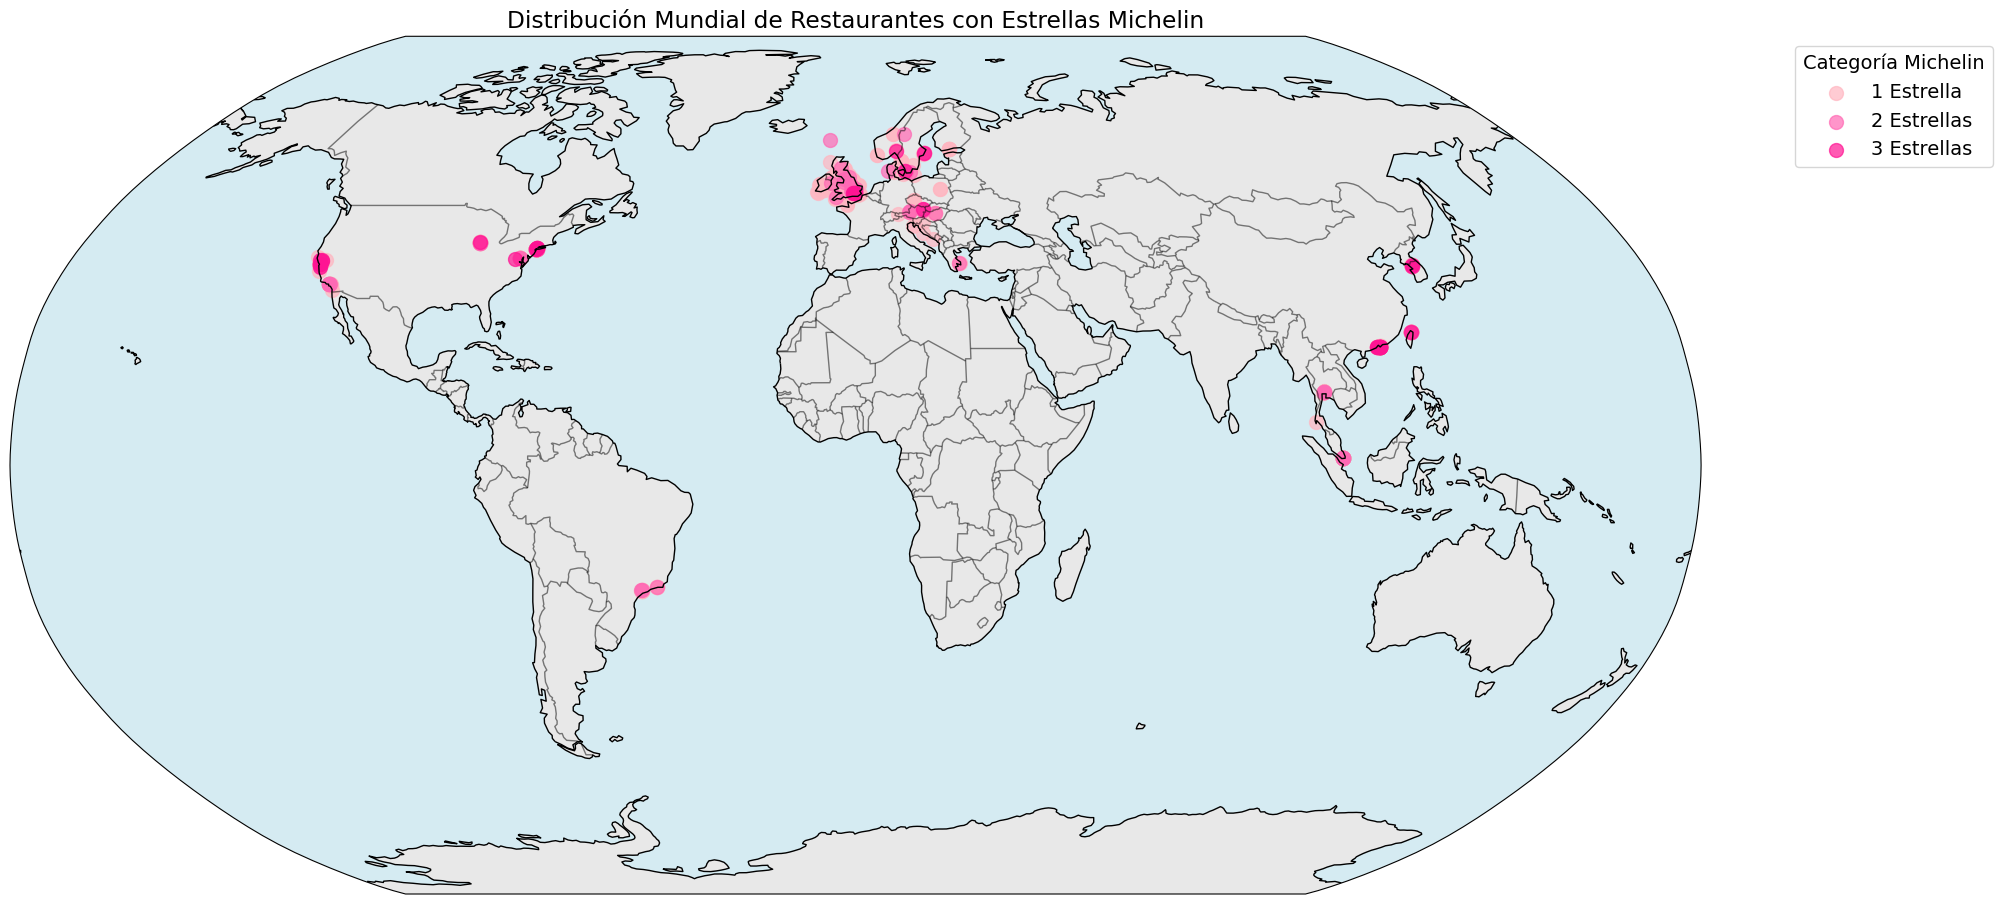

In [106]:
# 3. Creamos la figura con una proyección que muestre bien el mundo
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={
    'projection': gcrs.Robinson()
})

# 4. Creamos el GeoDataFrame
gdf = gpd.GeoDataFrame(
    restaurantes_michelin,
    geometry=gpd.points_from_xy(restaurantes_michelin.longitude, restaurantes_michelin.latitude),
    crs="EPSG:4326"
)

# 5. Definimos colores y tamaños para cada categoría
colors = {
    '1 Estrella': '#FFB6C1',
    '2 Estrellas': '#FF69B4',
    '3 Estrellas': '#FF1493'
}

# 6. Ploteamos los puntos por categoría
for estrella, color in colors.items():
    subset = gdf[gdf['estrellas'] == estrella]
    if not subset.empty:
        # Usamos scatter directamente en lugar de pointplot
        points = ax.scatter(
            subset.geometry.x,
            subset.geometry.y,
            c=color,
            label=estrella,
            alpha=0.7,
            s=100,  # Tamaño de los puntos
            transform=ccrs.PlateCarree()  # Importante para la correcta proyección
        )

# 7. Configuramos el mapa
ax.set_global()  # Mostramos todo el globo
ax.spines['geo'].set_visible(True)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, alpha=0.5)
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue', alpha=0.5)
ax.add_feature(cartopy.feature.LAND, facecolor='lightgray', alpha=0.5)

# 8. Añadimos elementos decorativos
ax.legend(title='Categoría Michelin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Distribución Mundial de Restaurantes con Estrellas Michelin')

# 9. Mostramos el mapa
plt.tight_layout()
plt.show()

## Ejercicio 4

¿Dónde se encuentran los restaurantes con estrellas en Reino Unido? Indicar el número de estrellas de cada uno.

In [109]:
# 1. Filtramos los restaurantes del Reino Unido
uk_restaurants = restaurantes_michelin[restaurantes_michelin['region'] == 'United Kingdom']

# 2. Creamos el GeoDataFrame para UK
uk_gdf = gpd.GeoDataFrame(
    uk_restaurants,
    geometry=gpd.points_from_xy(uk_restaurants.longitude, uk_restaurants.latitude),
    crs="EPSG:4326"
)

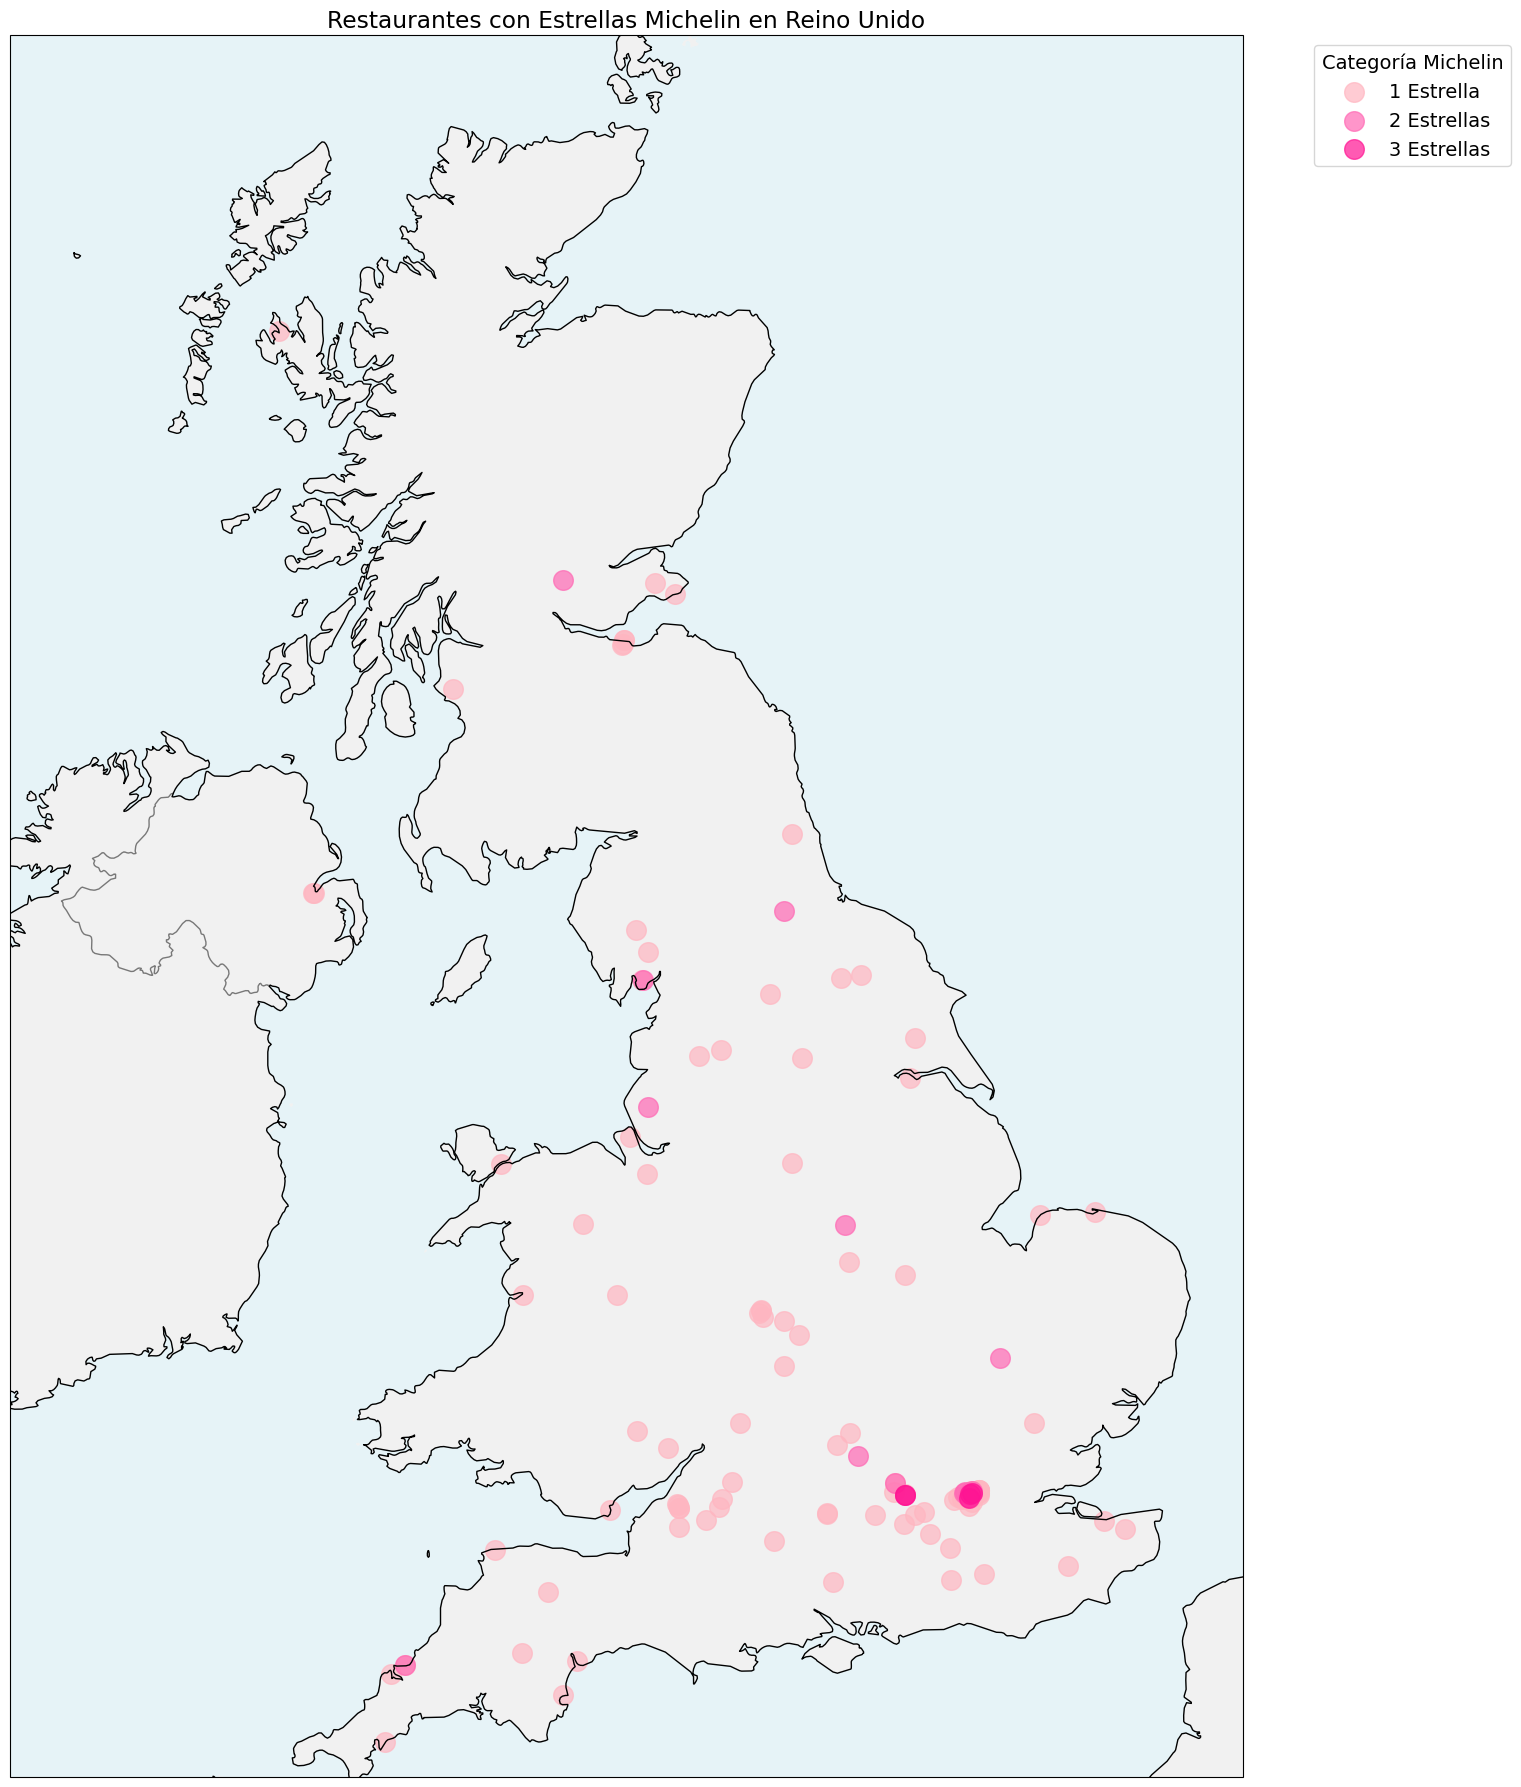

In [114]:
# 3. Creamos la figura con una proyección específica para UK
fig, ax = plt.subplots(figsize=(15, 20), subplot_kw={
    'projection': ccrs.TransverseMercator(central_longitude=-2, central_latitude=54)
})

# 4. Definimos colores y tamaños para cada categoría
colors = {
    '1 Estrella': '#FFB6C1',
    '2 Estrellas': '#FF69B4',
    '3 Estrellas': '#FF1493'
}

# 5. Ploteamos los puntos por categoría
for estrella, color in colors.items():
    subset = uk_gdf[uk_gdf['estrellas'] == estrella]
    if not subset.empty:
        points = ax.scatter(
            subset.geometry.x,
            subset.geometry.y,
            c=color,
            label=estrella,
            alpha=0.7,
            s=200,  # Puntos más grandes para mejor visibilidad
            transform=ccrs.PlateCarree()
        )
  

# 6. Configuramos el mapa
ax.set_extent([-8, 2, 50, 59], crs=ccrs.PlateCarree())  # Límites de UK
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.BORDERS, alpha=0.5)
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue', alpha=0.3)
ax.add_feature(cartopy.feature.LAND, facecolor='lightgray', alpha=0.3)

# 7. Añadimos elementos decorativos
ax.legend(title='Categoría Michelin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Restaurantes con Estrellas Michelin en Reino Unido')

plt.tight_layout()
plt.show()

In [111]:
# 8. Mostramos estadísticas
print("\nDistribución de estrellas Michelin en Reino Unido:")
print(uk_restaurants['estrellas'].value_counts().sort_index())


Distribución de estrellas Michelin en Reino Unido:
estrellas
1 Estrella     138
2 Estrellas     19
3 Estrellas      5
Name: count, dtype: int64


## Ejercicio 5

¿Cuantos premios se reparten cada año de cada tipo? ¿Hay de algún tipo que se reparta por encima del resto?